<a href="https://colab.research.google.com/github/adityayadav4507/100Days_of_ML/blob/main/55_Day_A_rigde_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of Ridge regression

In [88]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [89]:
from sklearn.datasets import load_diabetes
data=load_diabetes()
X=data.data
y=data.target

In [90]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=22)

In [91]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)


from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.48002331551397015

In [92]:
from sklearn.linear_model import Ridge
r=Ridge(alpha=0.1)
r.fit(X_train,y_train)
y_pred=r.predict(X_test)
r2_score(y_test,y_pred)

0.4817911607887968

# visuvalization of overfitting and underfitting

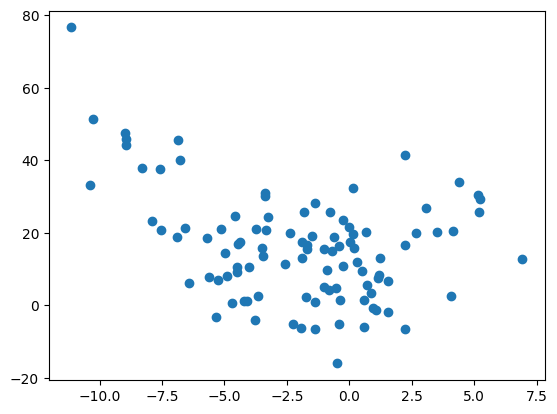

In [93]:
x=4*np.random.randn(100) -2
y= 0.5*x**2 + 0.8*x + 8 + 11*np.random.randn(100)

import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.1882e-33): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.27761e-32): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


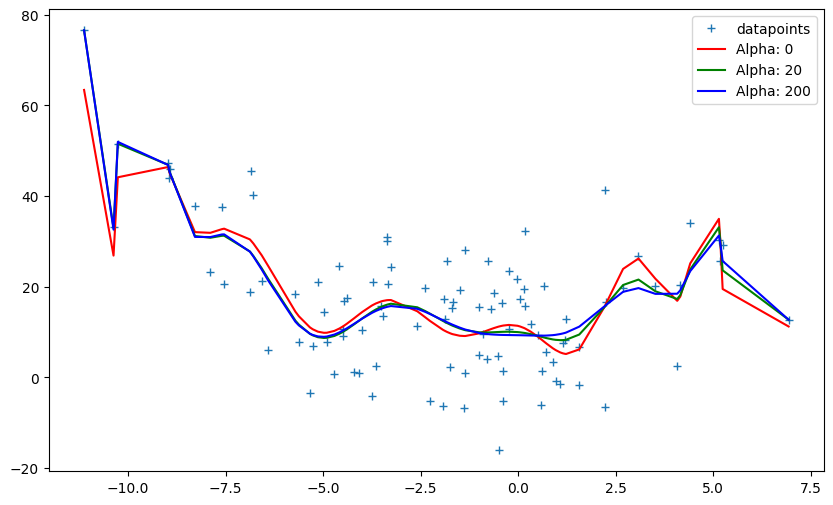

In [94]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def fn(x,y,alp):
    model=Pipeline([('poly',PolynomialFeatures(degree=16)),
                   ('linear',Ridge(alpha=alp))])

    # Reshape x to be a 2D array
    x_reshaped = x.reshape(-1, 1)

    model.fit(x_reshaped,y)
    return model.predict(x_reshaped)

alpha=[0,20,200]
cs=['r','g','b']

plt.figure(figsize=(10,6))
plt.plot(x,y,'+',label='datapoints')


for alpha, c in zip(alpha, cs):
    preds = fn(x, y, alpha)
    # Plot
    plt.plot(sorted(x), preds[np.argsort(x)], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()